# Home Exercise on Plagiarism Detection

## Overview

In this exercise, we develop a model that suggests similar products based on a given item. We utilize `Word2Vec()` to train the model and construct a recommendation system.
- Data: https://www.kaggle.com/datasets/samantas2020/online-retail-xlsx

Steps to Solve This Exercise
1. Data preprocessing (Download, Handle Missing Value and Split dataset (train set: 90%,test set:10%))
2. Build a representation model for products in the training dataset. (Model, Vocabulary and Training)
3. Visualize word2vec Embeddings
4. Build a function to compute the similarity of products.
5. This result is based on the vector of a single product. What happens if we want to recommend products to a customer based on the products they have previously chosen?

**Note**: Submit only a single Jupyter Notebook file that can handle all tasks, including data downloading, preprocessing, and model training. (Submissions that do not follow the guidelines will receive a score of 0.)

Attribute Information:

**InvoiceNo:**
Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode:**
Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**:
Product (item) name. Nominal.

**Quantity**:
The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**:
Invice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**:
Unit price. Numeric. Product price per unit in sterling .

**CustomerID**:
Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**:
Country name. Nominal. The name of the country where a customer resides.

In [75]:
%pip install pandas scikit-learn gensim matplotlib numpy kaggle openpyxl tqdm

Note: you may need to restart the kernel to use updated packages.


## Import and Download

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import os 
from tqdm import tqdm
import datetime as dt
from sklearn.manifold import TSNE
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
tqdm.pandas(desc="Processing text")

In [78]:
pd.set_option("max_colwidth", None)

In [79]:
# Set up the Kaggle API command
dataset_name = "samantas2020/online-retail-xlsx"
download_path = "datasets/"  # Change this to your preferred directory

# Ensure the download path exists
os.makedirs(download_path, exist_ok=True)

# Download the dataset using the Kaggle API
os.system(f"kaggle datasets download -d {dataset_name} -p {download_path} --unzip")

print(f"Dataset downloaded and extracted to: {download_path}")


Dataset downloaded and extracted to: datasets/


## Data Preprocessing

In [80]:
# Load the dataset
data_path = "datasets/Online Retail.xlsx"  # Replace with your path
df = pd.read_excel(data_path)

# Display the first few rows
print("Dataset loaded successfully!")
print(df.head())


Dataset loaded successfully!
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [82]:
for item in df["Description"].unique():
    print(item)
print(len(df["Description"].unique()))

WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
INFLATABLE POLITICAL GLOBE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND 
SPA

In [83]:
for item in df["StockCode"].unique():
    print(item)
print(len(df["StockCode"].unique()))

85123A
71053
84406B
84029G
84029E
22752
21730
22633
22632
84879
22745
22748
22749
22310
84969
22623
22622
21754
21755
21777
48187
22960
22913
22912
22914
21756
22728
22727
22726
21724
21883
10002
21791
21035
22326
22629
22659
22631
22661
21731
22900
21913
22540
22544
22492
POST
22086
20679
37370
21871
21071
21068
82483
82486
82482
82494L
21258
22114
21733
22386
85099C
21033
20723
84997B
84997C
21094
20725
21559
22352
21212
21975
21977
84991
84519A
85183B
85071B
21931
21929
22961
22139
84854
22411
82567
21672
22774
22771
71270
22262
22637
21934
21169
21166
21175
37444A
37444C
22083
84971S
47580
22261
84832
22644
21533
21557
15056BL
15056N
22646
22176
22438
22778
22719
21523
D
21912
21832
22379
22381
22798
22926
22839
22838
22783
35004C
82484
84755
22464
21324
22457
22469
22470
22224
21340
22189
22427
22428
22424
22663
85049A
22168
22662
84880
85099B
79321
22780
22779
22466
21363
21411
22318
22915
22922
22969
22923
21115
22242
22941
21622
35004G
85014B
85014A
22193
22192
22191
22195
2219

In [84]:
# Drop rows with missing descriptions
df = df.dropna(subset=['Description'])

In [85]:
df = df.sort_values(by=['InvoiceDate'])

In [86]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
24    536368     22914         BLUE COAT RACK PARIS FASHION         3   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5  2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6  2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7  2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8  2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
24 2010-12-01 08:34:00       4.95     13047.0  United Kingdom

In [87]:
grouped = df.groupby('InvoiceNo').agg({
    'Description': lambda x: list(x),  # List of product descriptions
    'CustomerID': 'first'  # Retain the same CustomerID for the invoice
}).reset_index()

In [88]:
grouped.head()

InvoiceNo  \
0    536365   
1    536366   
2    536367   
3    536368   
4    536369   

                                                                                                                                                                                                                                                                                                                                                   Description  \
0                                                                                                                              [WHITE HANGING HEART T-LIGHT HOLDER, WHITE METAL LANTERN, CREAM CUPID HEARTS COAT HANGER, KNITTED UNION FLAG HOT WATER BOTTLE, RED WOOLLY HOTTIE WHITE HEART., SET 7 BABUSHKA NESTING BOXES, GLASS STAR FROSTED T-LIGHT HOLDER]   
1                                                                                                                                                                                                                                                                                                          [HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT]   
2  [DOORMAT NEW ENGLAND, RECIPE BOX WITH METAL HEART, LOVE BUILDING BLOCK WORD, HOME BUILDING BLOCK WORD, BOX OF VINTAGE JIGSAW BLOCKS , BOX OF 6 ASSORTED COLOUR TEASPOONS, IVORY KNITTED MUG COSY , FELTCRAFT PRINCESS CHARLOTTE DOLL, POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE BEDROOM , ASSORTED COLOUR BIRD ORNAMENT, BOX OF VINTAGE ALPHABET BLOCKS]   
3                                                                                                                                                                                                                                        [BLUE COAT RACK PARIS FASHION, YELLOW COAT RACK PARIS FASHION, RED COAT RACK PARIS FASHION, JAM MAKING SET WITH JARS]   
4                                                                                                                                                                                                                                                                                                                                   [BATH BUILDING BLOCK WORD]   

   CustomerID  
0     17850.0  
1     17850.0  
2     13047.0  
3     13047.0  
4     13047.0

In [89]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24446 entries, 0 to 24445
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    24446 non-null  object 
 1   Description  24446 non-null  object 
 2   CustomerID   22190 non-null  float64
dtypes: float64(1), object(2)
memory usage: 573.1+ KB


In [64]:
# Split dataset into training and testing (90% train, 10% test)
# Note that here because word2vec is an unsupervised ML algorithm so when we train and test we do not see the labels here
# Here we just train the word2vec model to generate the vector embedding for a transaction. 
train_grouped, test_grouped = train_test_split(grouped, test_size=0.1, random_state=42)

print(f"Training set: {len(train_grouped)} rows")
print(f"Testing set: {len(test_grouped)} rows")

Training set: 22001 rows
Testing set: 2445 rows


In [65]:
# Train Word2Vec model
model = Word2Vec(sentences=train_grouped, vector_size=100, window=5, min_count=5, workers=4, sg=1, epochs=10)

# Extract embeddings for visualization
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])


In [66]:
for word in words[:10]:
    print(word)
    
print(len(words))
print(len(word_vectors))

WHITE HANGING HEART T-LIGHT HOLDER
REGENCY CAKESTAND 3 TIER
JUMBO BAG RED RETROSPOT
PARTY BUNTING
LUNCH BAG RED RETROSPOT
ASSORTED COLOUR BIRD ORNAMENT
SET OF 3 CAKE TINS PANTRY DESIGN 
PACK OF 72 RETROSPOT CAKE CASES
LUNCH BAG  BLACK SKULL.
POSTAGE
3519
3519


In [67]:
for i in range(len(words)):
    print(f"{words[i]} -> {word_vectors[i]}")

WHITE HANGING HEART T-LIGHT HOLDER -> [-7.9030934e-04  3.5998702e-01  1.6699094e-01 -2.4397982e-02
 -3.4788141e-01  2.2569815e-02  1.5758896e-01  6.9934738e-01
 -1.1040357e-01  3.4027824e-01 -5.5094104e-02 -1.3679636e-01
 -1.3415322e-01 -7.3944762e-02 -4.4675976e-02 -1.8858097e-02
  2.1744613e-01  5.4289609e-01 -2.6937637e-01 -8.1759644e-01
  2.8247321e-01  1.9865747e-01  1.4739355e-01 -2.4112442e-01
  9.7070731e-02  7.6561123e-02  1.9396035e-01 -4.8629511e-02
 -2.0435859e-01 -5.2013814e-02 -1.8859519e-01  7.0565768e-02
  4.5126370e-01 -9.7282521e-02 -2.2521727e-01  5.0812926e-02
  1.6322376e-01 -2.3647587e-01 -1.5548967e-01 -5.5701089e-01
  3.1706986e-03  3.6667117e-01 -2.1013884e-02  1.7752381e-01
 -2.7669358e-01 -2.8063694e-01  2.4605775e-02 -4.6889171e-02
  1.9120823e-01  6.6844368e-01 -1.6648193e-01  1.4489518e-02
 -7.5189099e-02 -1.5937191e-01 -5.6845868e-01  7.4783467e-02
 -1.7033447e-02 -4.0136564e-01 -1.6676019e-01  1.8815845e-01
  7.5610946e-03 -1.7641373e-01  9.3650278e-03 -

In [68]:
# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_vectors = tsne.fit_transform(word_vectors)

# Convert to DataFrame for plotting
df_embeddings = pd.DataFrame(reduced_vectors, columns=['x', 'y'])
df_embeddings['word'] = words

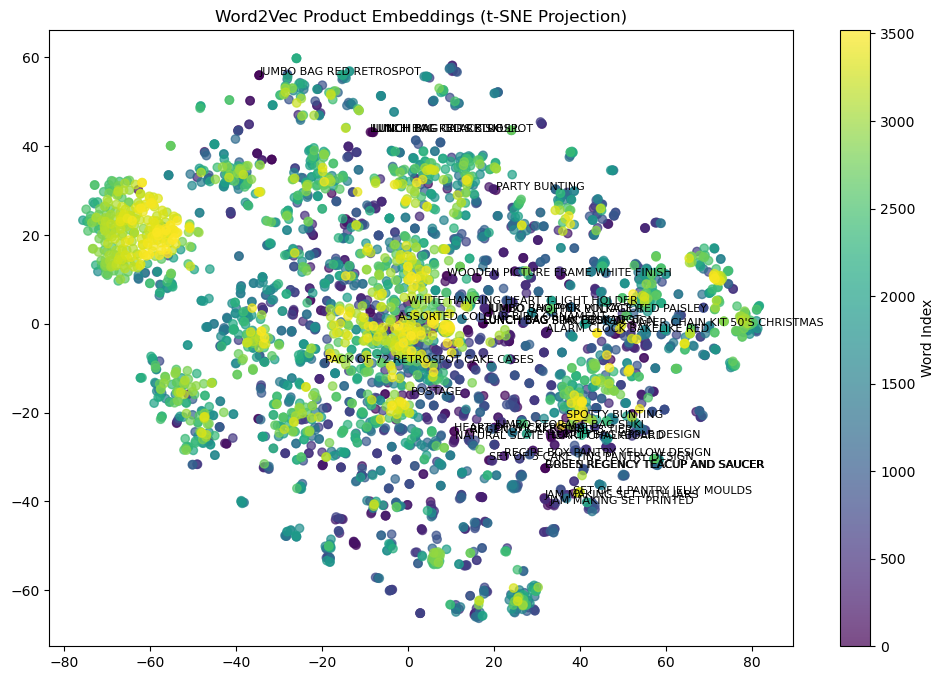

In [69]:
# Plot the embeddings with color for better visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_embeddings['x'], df_embeddings['y'], c=np.arange(len(df_embeddings)), cmap='viridis', alpha=0.7)

# Annotate some words for clarity
for i, word in enumerate(df_embeddings['word'][:30]):  # Show top 30 words
    plt.annotate(word, (df_embeddings.x[i], df_embeddings.y[i]), fontsize=8)

plt.colorbar(scatter, label="Word Index")
plt.title("Word2Vec Product Embeddings (t-SNE Projection)")
plt.show()

In [72]:
sample_test_invoice = test_grouped.sample(1)
print(sample_test_invoice)

InvoiceNo
568376    [HOT WATER BOTTLE KEEP CALM, KNITTED UNION FLAG HOT WATER BOTTLE, GAOLERS KEYS DECORATIVE GARDEN , GLASS APOTHECARY BOTTLE PERFUME, GLASS APOTHECARY BOTTLE ELIXIR, SOLDIERS EGG CUP , LUNCH BOX I LOVE LONDON, DOORMAT UNION FLAG, DOORMAT RESPECTABLE HOUSE, ASSORTED COLOUR BIRD ORNAMENT, EDWARDIAN PARASOL NATURAL, EDWARDIAN PARASOL RED, EDWARDIAN PARASOL BLACK, I LOVE LONDON BEAKER, SET OF 4 KNICK KNACK TINS LONDON , CLASSIC GLASS COOKIE JAR, EGG FRYING PAN IVORY , EGG FRYING PAN RED , TRAVEL CARD WALLET KEEP CALM, VINTAGE COFFEE GRINDER BOX]
Name: Description, dtype: object


In [70]:
# Choose a random invoice from the test set
sample_test_invoice = test_grouped.sample(1).values[0]

# Choose a random product from that invoice
sample_product = np.random.choice(sample_test_invoice)

# Get top 5 similar products
similar_products = model.wv.most_similar(sample_product, topn=5)

print(f"Product: {sample_product}")
print("Recommended similar products:")
for prod, score in similar_products:
    print(f"{prod} (similarity: {score:.2f})")

# Compare with actual products in the test invoice
print("\nActual products in the test invoice:")
print(sample_test_invoice)


Product: 10 COLOUR SPACEBOY PEN
Recommended similar products:
LIPSTICK PEN BABY PINK (similarity: 0.69)
LIPSTICK PEN RED (similarity: 0.68)
TOOTHPASTE TUBE PEN (similarity: 0.67)
LIPSTICK PEN FUSCHIA (similarity: 0.65)
GROW YOUR OWN PLANT IN A CAN  (similarity: 0.64)

Actual products in the test invoice:
['WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'BLUE HARMONICA IN BOX ', 'POPCORN HOLDER', 'RABBIT NIGHT LIGHT', 'RED TOADSTOOL LED NIGHT LIGHT', '10 COLOUR SPACEBOY PEN', 'BLACK RECORD COVER FRAME', 'RECORD FRAME 7" SINGLE SIZE ', 'CLASSIC CHROME BICYCLE BELL ', 'VINTAGE  2 METRE FOLDING RULER', 'VINTAGE BELLS GARLAND']


## Build a representation model for products in the training dataset (Model, Vocab, and Training)

## Visualize word2vec embeddings

## Build a function to calculate the similarity of products 

## This result is based on the vector of a single product. What happens if we want to recommend products to a customer based on the products they have previously chosen?